In [1]:
from PARCv2 import PARCv2
from Differentiator.Advection import Advection
from Differentiator.Differentiator import Differentiator
from Differentiator.FiniteDifference import FiniteDifference
from Integrator.Integrator import Integrator
from Integrator.RK4 import RK4

In [2]:
import torch
from torchmetrics.functional.image import image_gradients
import numpy as np
import matplotlib.pyplot as plt

### Finite difference testing

In [3]:
right_diff = FiniteDifference(padding_mode="replicate")

In [4]:
image = torch.arange(0, 1*1*5*5, dtype=torch.float32)
image = torch.reshape(image, (1, 1, 5, 5))
dy, dx = image_gradients(image)
dy[0, 0, :, :]

tensor([[5., 5., 5., 5., 5.],
        [5., 5., 5., 5., 5.],
        [5., 5., 5., 5., 5.],
        [5., 5., 5., 5., 5.],
        [0., 0., 0., 0., 0.]])

In [5]:
dx[0, 0, :, :]

tensor([[1., 1., 1., 1., 0.],
        [1., 1., 1., 1., 0.],
        [1., 1., 1., 1., 0.],
        [1., 1., 1., 1., 0.],
        [1., 1., 1., 1., 0.]])

In [6]:
dy, dx = right_diff(image)
dy[0, 0, :, :]

tensor([[5., 5., 5., 5., 5.],
        [5., 5., 5., 5., 5.],
        [5., 5., 5., 5., 5.],
        [5., 5., 5., 5., 5.],
        [0., 0., 0., 0., 0.]])

In [7]:
dx[0, 0, :, :]

tensor([[1., 1., 1., 1., 0.],
        [1., 1., 1., 1., 0.],
        [1., 1., 1., 1., 0.],
        [1., 1., 1., 1., 0.],
        [1., 1., 1., 1., 0.]])

### Advection testing

In [8]:
adv = Advection(right_diff)

In [9]:
data = np.load("/project/vil_baek/data/physics/transport_eqn_square/transport_eqn_square_64_1.00_8.00_8.00_1.00_2.00_8.00_120_0.10.npy")
adv_gt = (data[1, :, :, 0] - data[0, :, :, 0])/0.1

In [10]:
state_var = torch.permute(torch.tensor(data[0:1, :, :, 0:1], dtype=torch.float32), (0, 3, 1, 2))
vel_var = torch.permute(torch.tensor(data[0:1, :, :, 1:], dtype=torch.float32), (0, 3, 1, 2))
adv_parc = adv(state_var, vel_var)

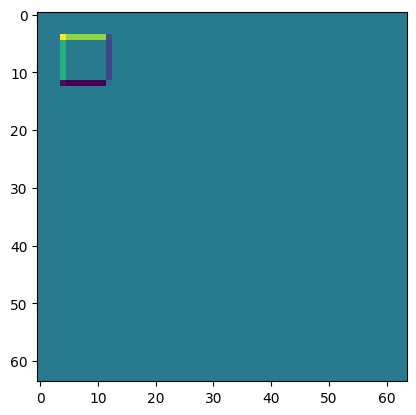

In [14]:
plt.imshow(-adv_gt)
plt.

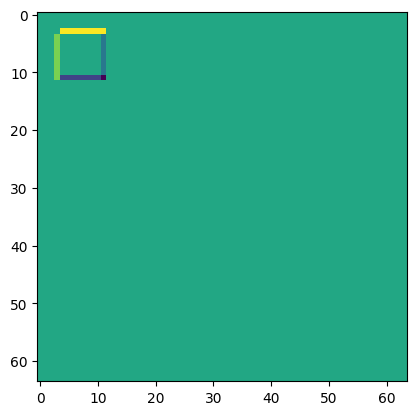

In [15]:
plt.imshow(adv_parc.detach().numpy()[0, 0, :, :])